# 1. Dataset Selection

In [5]:
# Load the datasets from the uploaded files
import pandas as pd

# File paths from user-uploaded data
mat_file_path = "./data/student-mat.csv"
por_file_path = "./data/student-por.csv"

# Reading the CSV files
student_mat = pd.read_csv(mat_file_path, sep=';')
student_por = pd.read_csv(por_file_path, sep=';')
num_rows_student_mat, num_attributes_student_mat = student_mat.shape
print(f"Number of rows in mat file: {num_rows_student_mat}")
print(f"Number of attributes (columns) in mat file: {num_attributes_student_mat}")

num_rows_student_por, num_attributes_student_por = student_por.shape
print(f"Number of rows in por file: {num_rows_student_por}")
print(f"Number of attributes (columns) in por file: {num_attributes_student_por}")
# Displaying the first few rows of both datasets to verify loading


Number of rows in mat file: 395
Number of attributes (columns) in mat file: 33
Number of rows in por file: 649
Number of attributes (columns) in por file: 33


In [6]:
# Reset the index of each DataFrame before concatenation
student_mat.reset_index(drop=True, inplace=True)
student_por.reset_index(drop=True, inplace=True)

# Concatenate the DataFrames
df = pd.concat([student_mat, student_por], ignore_index=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher  

In [8]:
df.describe()


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


Mapping: school {'GP': 0, 'MS': 1}
Mapping: sex {'F': 0, 'M': 1}
Mapping: address {'R': 0, 'U': 1}
Mapping: famsize {'GT3': 0, 'LE3': 1}
Mapping: Pstatus {'A': 0, 'T': 1}
Mapping: Mjob {'at_home': 0, 'health': 1, 'other': 2, 'services': 3, 'teacher': 4}
Mapping: Fjob {'at_home': 0, 'health': 1, 'other': 2, 'services': 3, 'teacher': 4}
Mapping: reason {'course': 0, 'home': 1, 'other': 2, 'reputation': 3}
Mapping: guardian {'father': 0, 'mother': 1, 'other': 2}
Mapping: schoolsup {'no': 0, 'yes': 1}
Mapping: famsup {'no': 0, 'yes': 1}
Mapping: paid {'no': 0, 'yes': 1}
Mapping: activities {'no': 0, 'yes': 1}
Mapping: nursery {'no': 0, 'yes': 1}
Mapping: higher {'no': 0, 'yes': 1}
Mapping: internet {'no': 0, 'yes': 1}
Mapping: romantic {'no': 0, 'yes': 1}


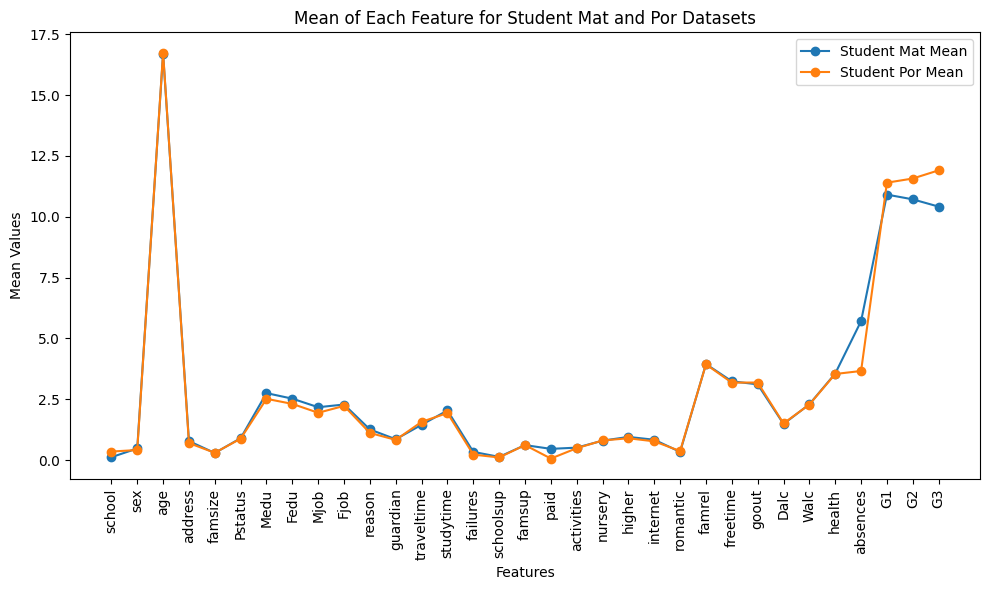

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

student_mat_mapping = student_mat
student_por_mapping = student_por

categorical_columns = df.select_dtypes(include='object').columns
for col in categorical_columns:
    le = LabelEncoder()
    student_mat_mapping[col] = le.fit_transform(student_mat[col])
    student_por_mapping[col] =  le.fit_transform(student_por_mapping[col])
    df[col] = le.fit_transform(df[col])
    mapping = dict(zip(le.classes_, range(len(le.classes_))))
    print(f"Mapping: {col}", mapping)

# Calculate the mean for each feature in both datasets
mat_means = student_mat_mapping.describe().loc['mean']
por_means = student_por_mapping.describe().loc['mean']

# Prepare data for plotting
mean_df = pd.DataFrame({
    "Features": mat_means.index,
    "Mat Mean": mat_means.values,
    "Por Mean": por_means.values
})


# Plotting
plt.figure(figsize=(10, 6))
plt.plot(mean_df["Features"], mean_df["Mat Mean"], marker='o', label="Student Mat Mean")
plt.plot(mean_df["Features"], mean_df["Por Mean"], marker='o', label="Student Por Mean")
plt.xlabel("Features")
plt.ylabel("Mean Values")
plt.title("Mean of Each Feature for Student Mat and Por Datasets")
plt.xticks(rotation=90)  # Rotate feature labels for readability
plt.legend()
plt.tight_layout()
plt.show()

# 2. Data Analysis

### 1. Distribution of Final Grades (G3)

### Why this visualization?
A histogram with a KDE overlay shows the overall distribution of final grades (G3).
It helps to identify patterns, such as normality, skewness, or clustering in grades.

### Significance
Highlights whether the data is evenly distributed or concentrated in specific grade ranges.
Identifies peaks (e.g., a high frequency of failing grades) or gaps in performance.

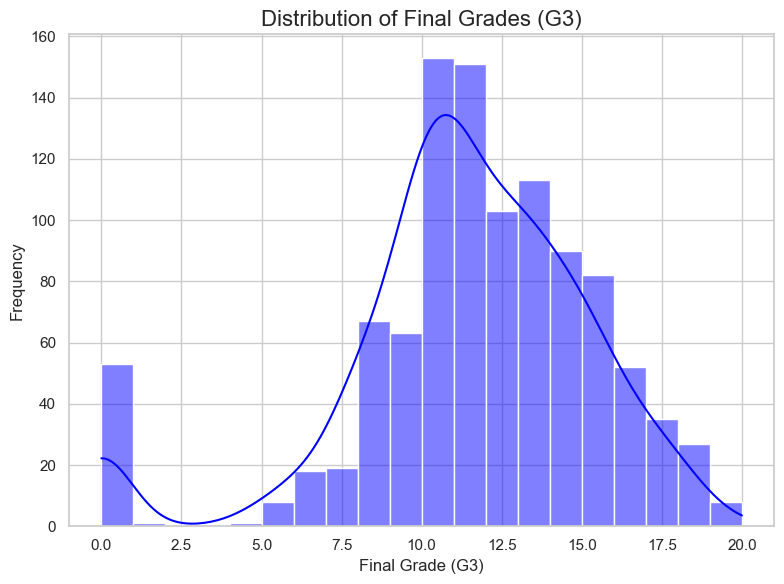

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for all plots
sns.set(style="whitegrid")

# 1. Distribution of Final Grades (G3)
plt.figure(figsize=(8, 6))
sns.histplot(df['G3'], bins=20, kde=True, color='blue')
plt.title('Distribution of Final Grades (G3)', fontsize=16)
plt.xlabel('Final Grade (G3)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()




### 2. Final Grade (G3) vs. Study Time

### Why this visualization?
A boxplot visualizes the relationship between weekly study time and final grades.
It shows how grade distributions differ across study time categories.

### Significance
Determines whether more study time correlates with higher grades.
Useful for identifying diminishing returns, such as students studying for long hours but not achieving better grades.

C:\Users\Yuval\AppData\Local\Temp\ipykernel_26980\1292014315.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='studytime', y='G3', data=df, palette='Set2')


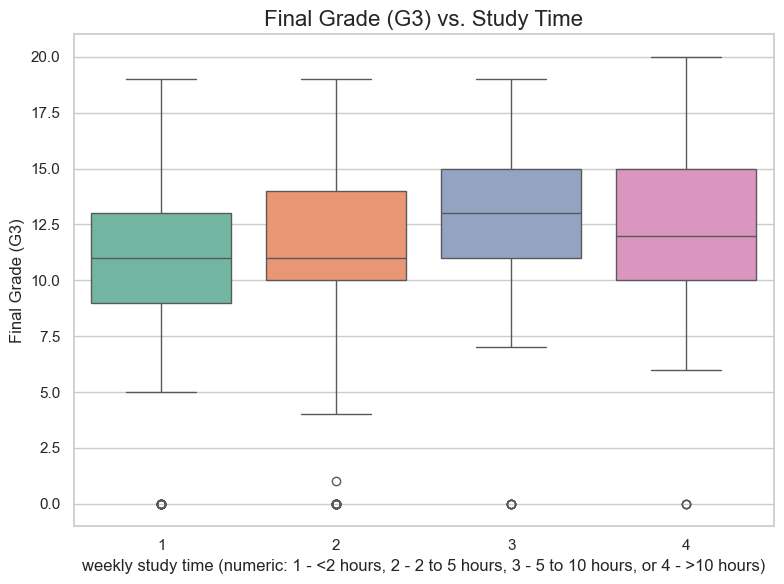

In [11]:
# 2. Final Grade (G3) vs. Study Time
plt.figure(figsize=(8, 6))
sns.boxplot(x='studytime', y='G3', data=df, palette='Set2')
plt.title('Final Grade (G3) vs. Study Time', fontsize=16)
plt.xlabel('weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)', fontsize=12)
plt.ylabel('Final Grade (G3)', fontsize=12)
plt.tight_layout()
plt.show()



### 3. Final Grade (G3) vs. Absences
### Why this visualization?
A scatter plot with a regression line highlights the relationship between absences and final grades.
Visualizes whether students with high absences tend to have lower grades.
### Significance
Helps assess the impact of absenteeism on academic success.
Provides evidence for attendance policies or interventions to improve performance


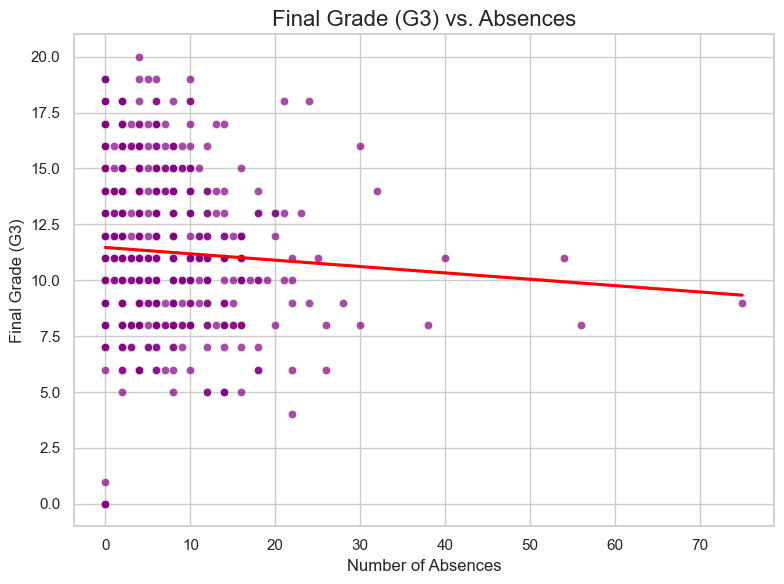

0.14763231197771587

In [12]:
# 3. Final Grade (G3) vs. Absences
plt.figure(figsize=(8, 6))
sns.scatterplot(x='absences', y='G3', data=df, color='purple', alpha=0.7)
sns.regplot(x='absences', y='G3', data=df, scatter=False, color='red', ci=None)
plt.title('Final Grade (G3) vs. Absences', fontsize=16)
plt.xlabel('Number of Absences', fontsize=12)
plt.ylabel('Final Grade (G3)', fontsize=12)
plt.tight_layout()
plt.show()
len(df[(df["G3"] == 0) & (df["absences"] == 0)])/len(df[(df["absences"] == 0)])


### 4. Final Grade (G3) vs. Parental Education Level

### Why this visualization?
A bar chart compares average final grades across levels of parental education.
Parental education levels (Medu and Fedu) are averaged to create a single measure.

### Significance
Demonstrates the role of parental education in academic performance.
Provides insights for support programs targeting students from less-educated households.

C:\Users\Yuval\AppData\Local\Temp\ipykernel_26980\2975769156.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='ParentalEducation', y='G3', data=parent_edu, ci=None, palette='Set3')
C:\Users\Yuval\AppData\Local\Temp\ipykernel_26980\2975769156.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ParentalEducation', y='G3', data=parent_edu, ci=None, palette='Set3')


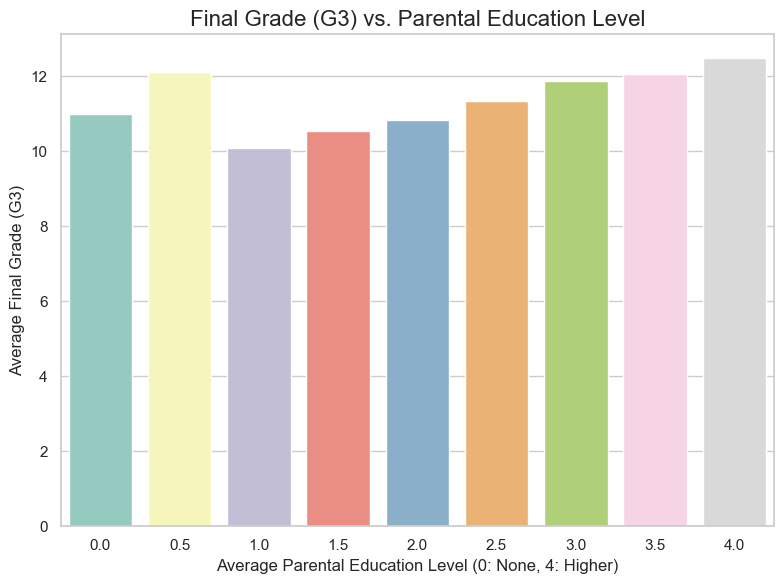

In [13]:

# 4. Final Grade (G3) vs. Parental Education Level
plt.figure(figsize=(8, 6))
parent_edu = df[['Medu', 'Fedu', 'G3']].assign(
    ParentalEducation=(df['Medu'] + df['Fedu']) / 2
)
sns.barplot(x='ParentalEducation', y='G3', data=parent_edu, ci=None, palette='Set3')
plt.title('Final Grade (G3) vs. Parental Education Level', fontsize=16)
plt.xlabel('Average Parental Education Level (0: None, 4: Higher)', fontsize=12)
plt.ylabel('Average Final Grade (G3)', fontsize=12)
plt.tight_layout()
plt.show()



### 5. Spearman Correlation Heatmap
### Why this visualization?
A heatmap provides a clear visual summary of correlations between features, helping identify strong relationships or redundancies among variables. Spearman correlation is ideal for rank-based, monotonic relationships.

### Significance
Highlights features like G2 and G1 as strong predictors of G3. Detects multicollinearity (e.g., Medu and Fedu) and weak predictors like famrel, guiding feature selection and model improvement.

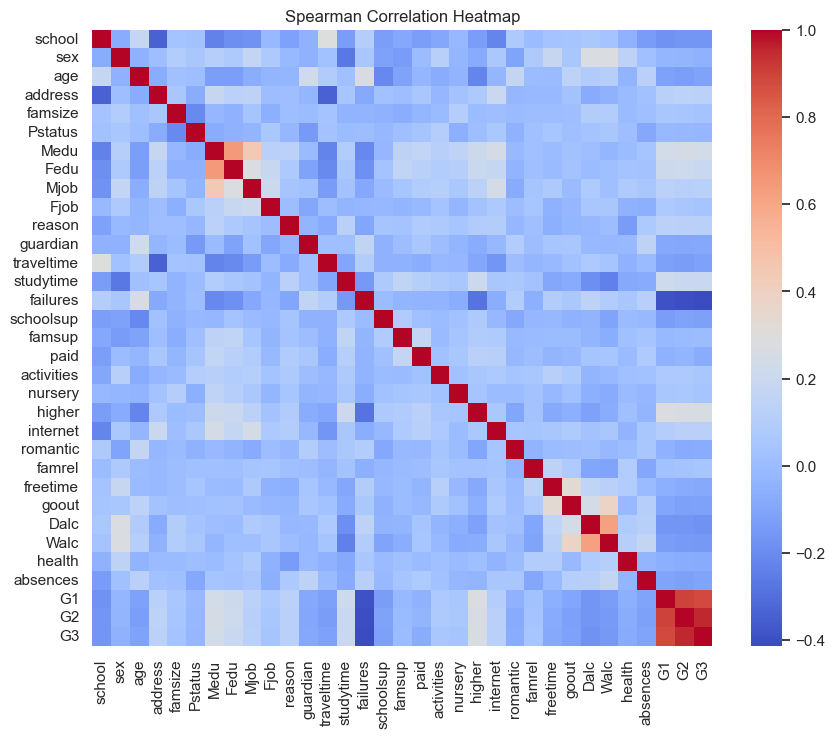

Bottom 25% for weak value: 0.07
Top 25% for strong: 0.17
Median 50% for strong: 0.12
Weak Correlation Threshold: 0.07207659088933185
Strong Correlation Threshold: 0.17187856405688476

Features with Weak Correlation with the target variable ('G3'):
sex          -0.044830
famsize       0.038775
Pstatus      -0.022960
Fjob          0.044536
famsup       -0.001473
activities    0.054092
nursery       0.043438
famrel        0.049388
Name: G3, dtype: float64

Features with Strong Correlation with the target variable ('G3')::
Medu         0.238312
Fedu         0.189954
studytime    0.189793
failures    -0.412660
higher       0.265759
Dalc        -0.171879
G1           0.884043
G2           0.952299
G3           1.000000
Name: G3, dtype: float64


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Compute Spearman correlation
spearman_correlation = df.corr(method='spearman')

# Create a heatmap
plt.figure(figsize=(10, 8))  # Set figure size
sns.heatmap(spearman_correlation, annot=False, cmap='coolwarm', cbar=True)
plt.title("Spearman Correlation Heatmap")
plt.show()

# Extract correlation with the target variable (e.g., 'G3')
correlation_with_target = spearman_correlation['G3']
# Compute absolute correlations
absolute_correlations = correlation_with_target.abs()

# Determine dynamic thresholds
weak_threshold = absolute_correlations.quantile(0.25)  # Bottom 25% for weak
print(f"Bottom 25% for weak value: {weak_threshold:.2f}")
strong_threshold = absolute_correlations.quantile(0.75)  # Top 25% for strong
print(f"Top 25% for strong: {strong_threshold:.2f}")
median_threshold = absolute_correlations.quantile(0.5)  
print(f"Median 50% for strong: {median_threshold:.2f}")

# Identify weak and strong correlation features
weak_correlation_features = correlation_with_target[absolute_correlations < weak_threshold].index.tolist()
strong_correlation_features = correlation_with_target[absolute_correlations >= strong_threshold].index.tolist()

# Display results
print(f"Weak Correlation Threshold: {weak_threshold}")
print(f"Strong Correlation Threshold: {strong_threshold}")

print("\nFeatures with Weak Correlation with the target variable ('G3'):")
print(correlation_with_target[weak_correlation_features])

print("\nFeatures with Strong Correlation with the target variable ('G3')::")
print(correlation_with_target[strong_correlation_features])


# 3. Basic Model Pipeline
Building and evaluating a regression model to predict students' final grades (G3) using the XGBoost Regressor

Accuracy within ±2: 89.47%
Mean Absolute Error (MAE): 1.07512558495813
Mean Squared Error (MSE): 3.2977491202118787
R² Score: 0.7867028072804747

MAE: Indicates that predictions are typically off by about 1.2 grade points, on average.
MSE: Shows a penalty for larger errors and confirms the model performs reasonably well.
R² Score: Suggests the model captures a significant portion (76%) of the variation in grades but still has room for improvement.



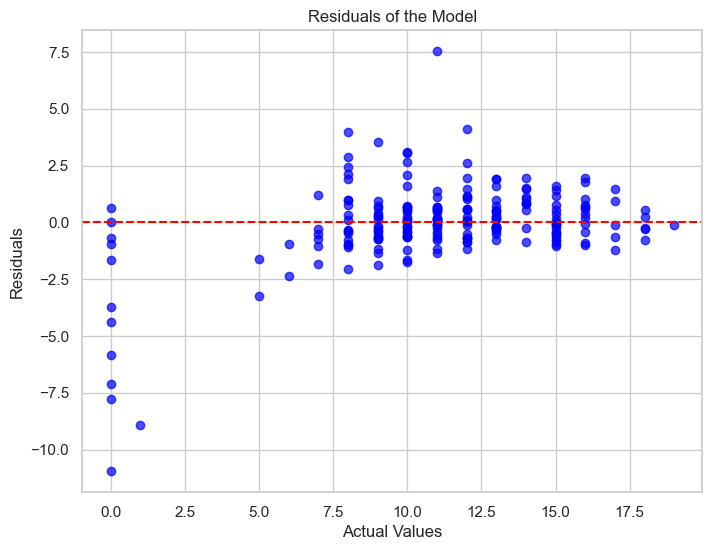

In [15]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder

# Prepare the data
# Filter out rows where 'absences' is 0 and 'G3' is 0
X = df.drop(columns=['G3'])  # Features
y = df['G3']  # Target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set up the model
model = XGBRegressor()

# Train the model
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
threshold = 2
accurate_predictions = np.sum(np.abs(y_test - y_pred) <= threshold)
accuracy = accurate_predictions / len(y_test) * 100
print(f"Accuracy within ±{threshold}: {accuracy:.2f}%")

# Print results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")
print("""
MAE: Indicates that predictions are typically off by about 1.2 grade points, on average.
MSE: Shows a penalty for larger errors and confirms the model performs reasonably well.
R² Score: Suggests the model captures a significant portion (76%) of the variation in grades but still has room for improvement.
""")
# Visualize residuals
import matplotlib.pyplot as plt
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals, alpha=0.7, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals of the Model')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.show()
# Extract feature importance
import pandas as pd

feature_importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for better readability
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False)





Outliers at lower actual values may impact accuracy

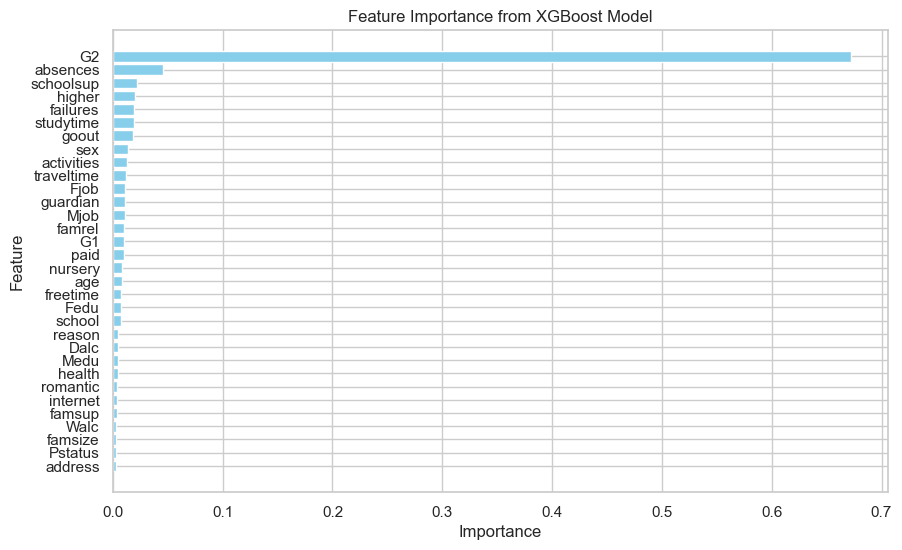

In [16]:
# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"], importance_df["Importance"], color='skyblue')
plt.title("Feature Importance from XGBoost Model")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.show()


The model's predictions are primarily driven by G2 and absences, indicating a potential overreliance on these features. While effective for prediction, this could limit the model's ability to generalize or perform well in scenarios where these key features are missing or ambiguous.

# 4. Error Analysis


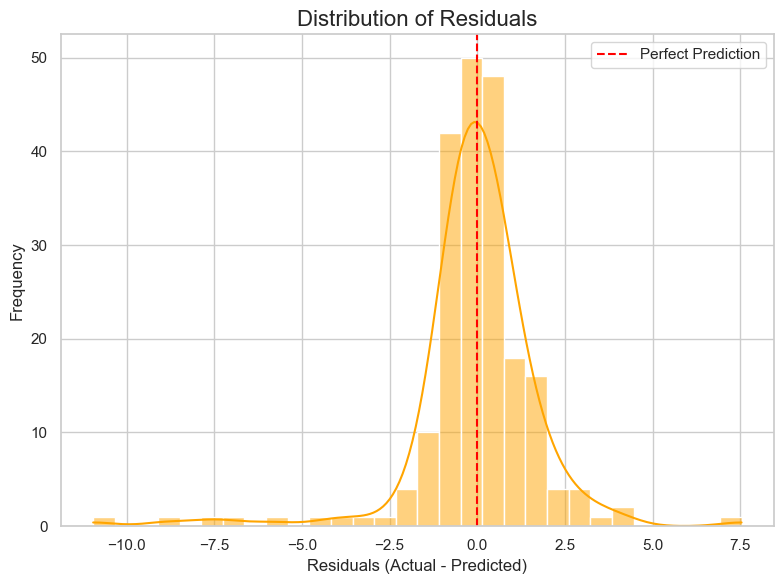

In [17]:
# Error Analysis

# Add residuals to the test set for analysis
test_set_with_residuals = X_test.copy()
test_set_with_residuals['Actual'] = y_test
test_set_with_residuals['Predicted'] = y_pred
test_set_with_residuals['Residual'] = test_set_with_residuals['Actual'] - test_set_with_residuals['Predicted']


# Visualization of residuals distribution
plt.figure(figsize=(8, 6))
sns.histplot(test_set_with_residuals['Residual'], kde=True, color='orange', bins=30)
plt.axvline(0, color='red', linestyle='--', label='Perfect Prediction')
plt.title('Distribution of Residuals', fontsize=16)
plt.xlabel('Residuals (Actual - Predicted)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()



### Identifying Best and Worst Predictions Based on Residuals

In [41]:
# Sort by largest residuals (absolute errors)
test_set_with_residuals['AbsoluteError'] = test_set_with_residuals['Residual'].abs()
filtered_data = test_set_with_residuals[test_set_with_residuals['Actual'] > 0]
worst_performance = filtered_data.sort_values(by='AbsoluteError', ascending=False).head(10)

worst_performance = test_set_with_residuals.sort_values(by='AbsoluteError', ascending=False).head(10)
best_performance = test_set_with_residuals.sort_values(by='AbsoluteError', ascending=True).head(10)


In [42]:
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
worst_performance

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,Actual,Predicted,Residual,AbsoluteError
558,0,1,18,1,1,1,1,1,2,2,0,1,1,1,2,0,0,0,0,1,0,1,1,2,3,5,2,5,4,0,11,9,0,10.951100,-10.951100,10.951100
567,0,1,16,1,0,1,3,3,2,3,0,0,1,2,1,0,1,0,0,1,1,1,1,4,5,5,4,4,5,0,10,10,1,9.898941,-8.898941,8.898941
310,0,0,19,1,1,1,1,2,3,3,1,2,1,2,1,0,0,0,1,0,1,0,1,4,2,4,2,2,3,0,9,9,0,7.792395,-7.792395,7.792395
745,0,1,19,0,1,1,2,1,0,3,0,1,2,3,1,0,0,0,1,1,1,1,1,4,3,1,1,1,5,0,9,10,11,3.465158,7.534842,7.534842
296,0,0,19,1,0,1,4,4,1,2,3,2,2,2,0,0,1,1,1,1,1,1,0,2,3,4,2,3,2,0,10,9,0,7.119703,-7.119703,7.119703
168,0,0,16,1,0,1,2,2,2,2,1,1,1,2,0,0,1,1,0,0,1,1,0,5,1,5,1,1,4,0,6,7,0,5.838446,-5.838446,5.838446
333,0,0,18,1,1,1,2,2,2,2,1,2,1,2,0,0,0,0,1,0,1,1,1,4,3,3,1,1,2,0,8,8,0,4.360751,-4.360751,4.360751
784,0,0,18,1,1,1,2,2,2,2,1,2,1,2,0,0,0,0,1,0,1,1,1,4,3,3,1,1,2,0,10,9,12,7.873707,4.126293,4.126293
848,1,0,16,1,0,1,1,2,2,3,0,1,1,3,1,0,1,0,0,1,1,0,0,1,3,2,1,2,4,0,10,8,8,3.999240,4.000760,4.000760
978,1,0,18,0,0,1,2,2,2,2,2,1,2,1,1,0,0,0,0,1,0,1,1,5,5,5,1,1,3,0,8,6,0,3.707786,-3.707786,3.707786


In [37]:
best_performance

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,Actual,Predicted,Residual,AbsoluteError
120,0,0,15,1,0,1,1,2,0,3,0,1,1,2,0,0,0,0,0,0,1,1,0,3,2,3,1,2,1,2,16,15,15,14.997087,0.002913,0.002913
305,0,0,18,1,0,1,2,4,3,0,3,2,1,2,1,0,1,1,1,1,1,1,0,4,4,3,1,1,3,8,14,12,12,11.994398,0.005602,0.005602
598,0,1,17,0,0,1,1,2,0,2,1,1,1,2,0,0,0,0,0,1,1,0,0,3,1,3,1,5,3,6,9,9,10,9.971669,0.028331,0.028331
244,0,0,18,1,0,1,2,1,2,2,0,2,2,3,0,0,1,1,0,0,1,1,1,4,4,4,1,1,3,0,7,0,0,-0.035030,0.035030,0.035030
798,0,0,17,1,0,1,2,1,3,2,0,1,2,2,0,0,1,0,1,1,1,1,1,4,3,4,2,2,1,10,12,15,15,15.051345,-0.051345,0.051345
70,0,1,16,1,0,1,3,1,2,2,3,0,2,4,0,0,1,1,0,1,1,1,0,4,3,2,1,1,5,0,13,15,15,15.056379,-0.056379,0.056379
440,0,0,15,1,1,0,4,3,2,2,0,1,1,2,0,1,1,1,1,1,1,1,1,5,2,2,1,1,5,4,10,11,11,11.057231,-0.057231,0.057231
858,1,0,15,0,1,1,2,2,2,2,2,0,1,3,0,1,1,0,0,1,1,0,0,4,4,3,2,2,5,2,14,11,12,11.941889,0.058111,0.058111
894,1,0,16,1,0,1,2,2,3,2,0,1,1,1,0,0,1,1,1,1,1,0,1,4,2,5,1,2,5,0,17,16,16,16.082342,-0.082342,0.082342
993,1,1,18,1,1,1,1,2,0,3,1,1,2,1,0,0,1,0,0,0,1,0,0,4,1,4,5,5,1,8,10,11,11,10.913136,0.086864,0.086864


I observed that the model struggles to predict cases where G3 = 0 while G1 and G2 are non-zero. This suggests that these instances might represent students who were absent during the final exam, resulting in a grade of 0. To better understand the model's behavior, I decided to further investigate cases where G3 is non-zero to identify patterns or potential issues in the predictions.

Strong Predictors for Worst Performers:
G3 (itself), Guardian, Age, Romantic relationships are key factors differentiating worst performers.

Strong Predictors for Best Performers:
Mother's Education (Medu), **Early Grades (G1, G2)**, Aspiration for Higher Education (Higher) play a significant role.

In [21]:
# Sort by AbsoluteError and filter rows where G3 != 0
worst_performance = (
    test_set_with_residuals
    .sort_values(by='AbsoluteError', ascending=False)
    .query("Actual != 0")  # Filters out rows where G3 is 0
    .head(10)  # Select the top 10 rows
)

# Display the filtered DataFrame
worst_performance


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,Actual,Predicted,Residual,AbsoluteError
567,0,1,16,1,0,1,3,3,2,3,0,0,1,2,1,0,1,0,0,1,1,1,1,4,5,5,4,4,5,0,10,10,1,9.898941,-8.898941,8.898941
745,0,1,19,0,1,1,2,1,0,3,0,1,2,3,1,0,0,0,1,1,1,1,1,4,3,1,1,1,5,0,9,10,11,3.465158,7.534842,7.534842
784,0,0,18,1,1,1,2,2,2,2,1,2,1,2,0,0,0,0,1,0,1,1,1,4,3,3,1,1,2,0,10,9,12,7.873707,4.126293,4.126293
848,1,0,16,1,0,1,1,2,2,3,0,1,1,3,1,0,1,0,0,1,1,0,0,1,3,2,1,2,4,0,10,8,8,3.999240,4.000760,4.000760
1019,1,0,17,0,0,1,1,1,2,3,3,1,3,1,1,0,1,0,0,1,1,1,1,5,2,1,1,2,1,0,8,8,9,5.444014,3.555986,3.555986
72,0,0,15,0,0,1,1,1,2,2,3,1,1,2,2,1,1,0,0,0,1,1,1,3,3,4,2,4,5,2,8,6,5,8.225248,-3.225248,3.225248
462,0,0,16,1,0,1,3,1,3,2,0,1,1,4,0,1,1,0,0,1,1,1,0,4,3,3,1,2,5,0,10,9,10,6.904068,3.095932,3.095932
2,0,0,15,1,1,1,1,1,0,2,2,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10,6.936459,3.063541,3.063541
247,0,1,22,1,0,1,3,1,3,3,2,1,1,1,3,0,0,0,0,0,0,1,1,5,4,5,5,5,1,16,6,8,8,5.117805,2.882195,2.882195
718,0,1,18,1,1,1,4,3,4,3,0,1,2,1,0,0,0,0,1,1,1,1,0,4,2,3,1,2,1,0,10,10,10,7.332242,2.667758,2.667758


### Comparison of Feature Means Across Worst, Best, and Overall Predictions

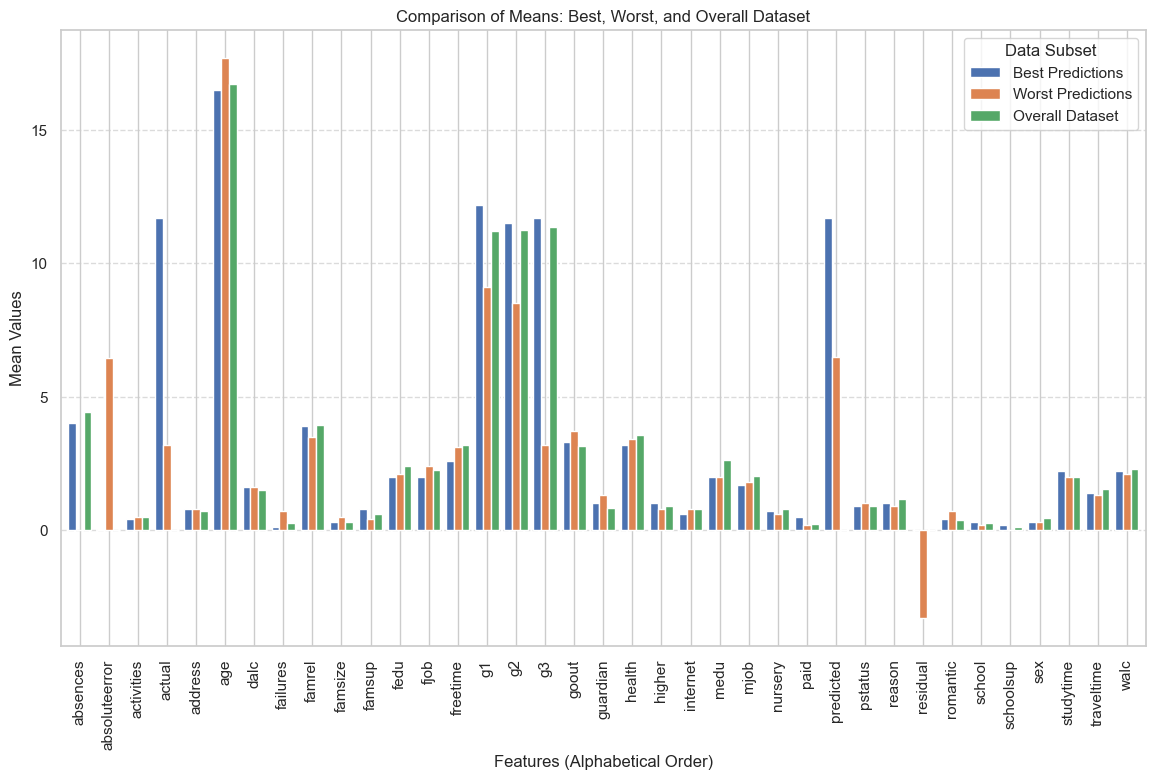

In [43]:
worst_stats = worst_performance.describe()
best_performance_stats = best_performance.describe()
overall_stats = df.describe()

worst_stats['G3'] = worst_stats['Actual']
best_performance_stats['G3'] = best_performance_stats['Actual']

best_performance_stats_means = best_performance_stats.loc['mean']

woest_performance_stats_means = worst_stats.loc['mean']

overall_means = overall_stats.loc['mean']


# Combine into a single DataFrame for comparison
comparison_means = pd.DataFrame({
    'Best Predictions': best_performance_stats_means,
    'Worst Predictions': woest_performance_stats_means,
    'Overall Dataset': overall_means
})
# Sort the DataFrame alphabetically by feature names (index)
# comparison_means_sorted = comparison_means.sort_index()
comparison_means_sorted = comparison_means.rename(index=str.lower).sort_index()

# Plot comparison as a grouped bar chart
comparison_means_sorted.plot(kind='bar', figsize=(14, 8), width=0.8)

# Add title and labels
plt.title('Comparison of Means: Best, Worst, and Overall Dataset')
plt.xlabel('Features (Alphabetical Order)')
plt.ylabel('Mean Values')
plt.legend(title='Data Subset')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



### Identifying Significant Feature Differences Between Worst/Best Predictions and Overall Dataset

In [44]:
# Compute the absolute differences
gaps_worst_overall = (comparison_means['Worst Predictions'] - comparison_means['Overall Dataset']).abs()
gaps_best_overall = (comparison_means['Best Predictions'] - comparison_means['Overall Dataset']).abs()

# Calculate Z-scores
z_scores_worst_overall = gaps_worst_overall / overall_stats.loc['std']
z_scores_best_overall = gaps_best_overall / overall_stats.loc['std']

# Identify features with significant Z-scores
significant_z_scores = pd.DataFrame({
    'Feature': comparison_means.index,
    'Z-Score Worst vs Overall': z_scores_worst_overall,
    'Z-Score Best vs Overall': z_scores_best_overall
}).sort_values(by=['Z-Score Worst vs Overall', 'Z-Score Best vs Overall'], ascending=False)

print(significant_z_scores.head(12))



           Feature  Z-Score Worst vs Overall  Z-Score Best vs Overall
G3              G3                  2.106697                 0.092643
guardian  guardian                  0.880304                 0.309710
G2              G2                  0.835954                 0.077268
age            age                  0.785457                 0.182305
romantic  romantic                  0.719712                 0.093214
absences  absences                  0.714147                 0.070027
G1              G1                  0.708455                 0.330630
failures  failures                  0.663930                 0.250507
Medu          Medu                  0.536443                 0.536443
nursery    nursery                  0.499103                 0.249312
goout        goout                  0.471874                 0.124825
famrel      famrel                  0.466920                 0.038380


### Worst Performing Features:

### Failures (Z-Score: 1.43):
Model struggles with students having failures due to complex interactions with other features.

### G1 and G2 (Z-Scores: 0.81, 0.81):
While strong predictors, edge cases like G3=0 and G1/G2 > 0 confuse the model.

### Fedu (Z-Score: 0.72):
Model fails to capture the indirect impact of parental education on grades.

### Best Performing Features:

### G2 (Z-Score: 0.08):
Strong correlation (0.95) makes it the most reliable predictor.

### Romantic (Z-Score: 0.09):
Minimal impact on predictions.

### Dalc (Z-Score: 0.12):
Moderately correlated but well-handled by the model.

### Key Reason for Poor Performance:
The model struggles with features involving complex or indirect relationships to G3, such as failures and Fedu, while excelling with directly correlated features like G2

Residuals are centered around zero for most absence categories.

Some absence categories show outliers, particularly at the lower absence counts.

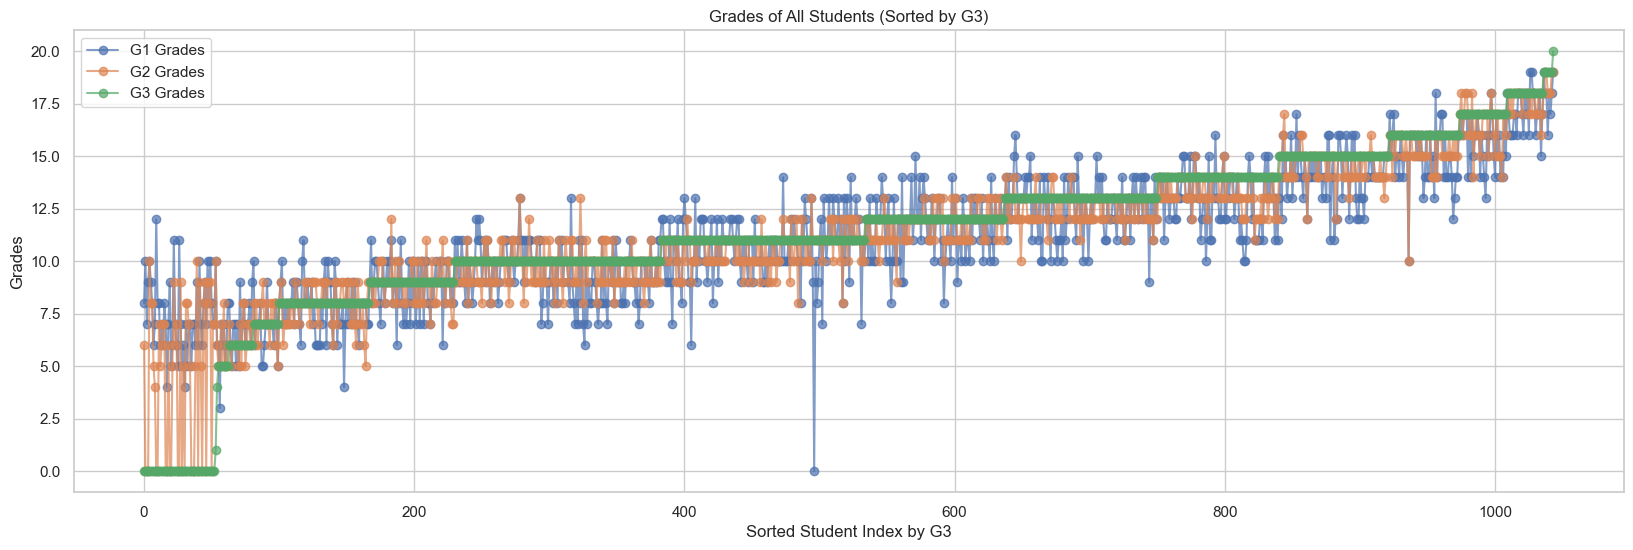

In [24]:
import matplotlib.pyplot as plt

# Sort the DataFrame by G3
df_sorted = df.sort_values(by='G3').reset_index(drop=True)

# Line plot for G1, G2, and G3 grades
plt.figure(figsize=(20, 6))
plt.plot(df_sorted.index, df_sorted['G1'], label='G1 Grades', marker='o', alpha=0.7)
plt.plot(df_sorted.index, df_sorted['G2'], label='G2 Grades', marker='o', alpha=0.7)
plt.plot(df_sorted.index, df_sorted['G3'], label='G3 Grades', marker='o', alpha=0.7)

# Add labels, legend, and title
plt.xlabel('Sorted Student Index by G3')
plt.ylabel('Grades')
plt.title('Grades of All Students (Sorted by G3)')
plt.legend()
plt.grid(True)
plt.show()


This plot demonstrates a clear correlation between G1, G2, and G3 grades, as students' grades across these periods generally increase together. However, some students who achieved average grades in G1 and G2 received a G3 grade of 0, which significantly deviates from the trend. This could suggest external factors affecting these students' final performance (e.g., missing the final exam or other disruptions).

# Is the model mostly overestimating? underestimating? Why?

### The model overestimating for the following reasons:

From the Heatmap: Features like **G2 and G1** are strongly positively correlated with **G3**. The model likely overemphasizes these features, inflating predictions for students with high intermediate grades.

From Feature Importance: The model **relies heavily on G2** (dominant importance), but it may not fully account for negatively correlated features like **failures**, which could temper predictions, leading to overestimations.

### The model underestimates for the following reasons:

From the Heatmap: Multicollinearity Issues. G1, G2, and G3 are highly correlated. Multicollinearity among these features can cause the model to improperly distribute importance, focusing excessively on G2.

From Feature Importance: Features such as studytime and absences may not have a simple linear relationship with grades.
Students with high study time or unusual absence patterns might not be properly modeled, leading to mispredictions.

In [25]:
# Summarize error analysis results for clarity
# Overestimation vs Underestimation
overestimation = (test_set_with_residuals['Residual'] < 0).sum()
underestimation = (test_set_with_residuals['Residual'] > 0).sum()

# Calculate key metrics for residuals
total_predictions = len(test_set_with_residuals)
overestimations = (test_set_with_residuals['Residual'] < 0).sum()
underestimations = (test_set_with_residuals['Residual'] > 0).sum()

# Compute percentages
overestimation_percentage = (overestimations / total_predictions) * 100
underestimation_percentage = (underestimations / total_predictions) * 100

# Display summary statistics for residuals
print(
    f"Total Predictions: {total_predictions},\n "
    f"Overestimations: {overestimations},\n "
    f"Overestimation Percentage: {overestimation_percentage:.2f}%,\n "
    f"Underestimations: {underestimations}, \n"
    f"Underestimation Percentage: {underestimation_percentage:.2f}%, \n"
    f"Mean Residual: {test_set_with_residuals['Residual'].mean()},\n "
    f"Median Residual: {test_set_with_residuals['Residual'].median()}\n"
)




Total Predictions: 209,
 Overestimations: 103,
 Overestimation Percentage: 49.28%,
 Underestimations: 106, 
Underestimation Percentage: 50.72%, 
Mean Residual: -0.03415949245175106,
 Median Residual: 0.0056018829345703125



# Are some features sabotaging the model? How?
### Identifying Misleading and Noisy Features Based on Importance and Correlation

In [26]:
import pandas as pd

# Assume 'model' is your trained model and 'X_train' is the feature data
# Compute feature importance
feature_importances = model.feature_importances_
feature_names = X_train.columns

# Compute Spearman correlation with the target variable
spearman_correlation = df.corr(method='spearman')['G3']  # Replace 'G3' with your target

# Create a DataFrame for analysis
analysis_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances,
    'Correlation': spearman_correlation[feature_names]
})

# Define thresholds
weak_correlation_threshold =spearman_correlation.mean() 
low_importance_threshold = feature_importances.mean()  

# Identify features with:
# 1. High importance but weak correlation
high_importance_weak_correlation = analysis_df[
    (analysis_df['Importance'] >= low_importance_threshold) & 
    (analysis_df['Correlation'].abs() < weak_correlation_threshold)
]

# 2. Low importance and weak/no correlation
low_importance_weak_correlation = analysis_df[
    (analysis_df['Importance'] < low_importance_threshold) & 
    (analysis_df['Correlation'].abs() < weak_correlation_threshold)
]




1. Weak Correlation Features with Importance:

Features like absences have weak correlation with the target (G3, correlation = 0.0177) but are assigned high importance (importance = 0.1627).

How it Sabotages:
The model may overfit to features like absences, treating them as significant predictors even though their relationship with G3 is weak. This can lead to noisy predictions and reduced generalization.


In [27]:
# Display results
print("Features with High Importance but Weak Correlation:")
print(high_importance_weak_correlation)



Features with High Importance but Weak Correlation:
Empty DataFrame
Columns: [Feature, Importance, Correlation]
Index: []


2. Low Importance and Weak Correlation Features:

Features such as school, famsize, Pstatus, and Fjob have both low importance and weak correlations.

How it Sabotages:
These features likely introduce noise without contributing to meaningful predictions. Retaining them may dilute the model's focus on more relevant features.

In [28]:
print("\nFeatures with Low Importance and Weak Correlation:")
print(low_importance_weak_correlation)


Features with Low Importance and Weak Correlation:
               Feature  Importance  Correlation
sex                sex    0.014056    -0.044830
famsize        famsize    0.002762     0.038775
Pstatus        Pstatus    0.002714    -0.022960
Fjob              Fjob    0.011296     0.044536
famsup          famsup    0.003363    -0.001473
paid              paid    0.010092    -0.073289
activities  activities    0.013118     0.054092
nursery        nursery    0.008358     0.043438
romantic      romantic    0.004043    -0.072077
famrel          famrel    0.010320     0.049388


### Identifying the Most Unnecessary Features Using Ablation Testing

In [29]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

# Initialize variables
worst_score = -float('inf')  # Best MAE score
unnecessary_feature = None  # Feature whose removal gives the best score
scores_map = {}  # To store MAE scores for each feature

# Train-test split (only done once to ensure consistency across iterations)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Evaluate each feature by removing it and retraining the model
for feature in X.columns:
    # Drop the current feature
    X_subset_train = X_train.drop(columns=[feature])
    X_subset_test = X_test.drop(columns=[feature])
    
    # Train the model
    model = XGBRegressor()
    model.fit(X_subset_train, y_train)
    
    # Predict and calculate MAE
    y_pred = model.predict(X_subset_test)
    mae = mean_absolute_error(y_test, y_pred)
    scores_map[feature] = mae
    
    # Track the best feature
    if mae > worst_score:
        worst_score = mae
        unnecessary_feature = feature

# Sort the results by MAE (ascending) and get the top 12 features
sorted_scores = sorted(scores_map.items(), key=lambda item: item[1])

# Display results
print("Features Impact (MAE):")
for rank, (feature, score) in enumerate(sorted_scores, start=1):
    print(f"{rank}. {feature}: {score:.4f}")



Features Impact (MAE):
1. G1: 1.0071
2. goout: 1.0158
3. freetime: 1.0398
4. reason: 1.0401
5. sex: 1.0404
6. Dalc: 1.0416
7. studytime: 1.0423
8. famrel: 1.0426
9. health: 1.0431
10. Fjob: 1.0435
11. famsup: 1.0469
12. paid: 1.0474
13. schoolsup: 1.0488
14. famsize: 1.0505
15. Fedu: 1.0507
16. romantic: 1.0570
17. address: 1.0587
18. Walc: 1.0641
19. Mjob: 1.0654
20. nursery: 1.0663
21. guardian: 1.0679
22. traveltime: 1.0681
23. Pstatus: 1.0682
24. higher: 1.0761
25. Medu: 1.0764
26. school: 1.0828
27. activities: 1.0872
28. age: 1.0927
29. failures: 1.0972
30. internet: 1.1011
31. absences: 1.2562
32. G2: 1.6206


Over-reliance on Dominant Features:

The model heavily depends on G2 (MAE: 1.6206) and absences (MAE: 1.2562), which may lead to overfitting and poor generalization.

Noisy Features:

Features like failures (MAE: 1.0972) and internet (MAE: 1.1011) may add noise, reducing model accuracy.

Low-Impact Features:

Features such as activities, age, and paid have minimal influence and could be irrelevant.

Multicollinearity Risks:

Features like Medu, Fedu, and Mjob may overlap in information, confusing the model and affecting its robustness.

In [30]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Compute VIF for all features
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Identify features with high VIF
high_vif_features = vif_data[vif_data["VIF"] > 5]

print("Features with High VIF:")
print(high_vif_features)

# Check pairwise correlation for high VIF features
correlation_matrix = X.corr()  # Pairwise correlation matrix
for feature in high_vif_features["Feature"]:
    correlated_features = correlation_matrix[feature][correlation_matrix[feature].abs() > 0.4].index.tolist()
    correlated_features.remove(feature)  # Exclude self-correlation
    if correlated_features:
        print(f"Feature '{feature}' has high correlation with: {correlated_features}")


Features with High VIF:
       Feature        VIF
2          age  84.380485
5      Pstatus   9.690159
6         Medu  14.031996
7         Fedu  10.564228
8         Mjob   5.163177
9         Fjob   8.585269
12  traveltime   6.408886
13   studytime   8.145209
19     nursery   5.256576
20      higher  13.736145
21    internet   5.777630
23      famrel  20.123886
24    freetime  12.731230
25       goout  11.954308
26        Dalc   6.517565
27        Walc   8.648841
28      health   7.758479
30          G1  62.226984
31          G2  50.887096
Feature 'Medu' has high correlation with: ['Fedu', 'Mjob']
Feature 'Fedu' has high correlation with: ['Medu']
Feature 'Mjob' has high correlation with: ['Medu']
Feature 'Dalc' has high correlation with: ['Walc']
Feature 'Walc' has high correlation with: ['Dalc']
Feature 'G1' has high correlation with: ['G2']
Feature 'G2' has high correlation with: ['G1']


Features like G1 (VIF = 62.22), and G2 (VIF = 50.88) have extremely high Variance Inflation Factor (VIF) values, indicating multicollinearity.

How it Sabotages:
Multicollinearity leads to redundancy and instability in feature coefficients. For instance, the model may struggle to distinguish the independent effects of G1, G2, and G3 due to their high correlation.

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


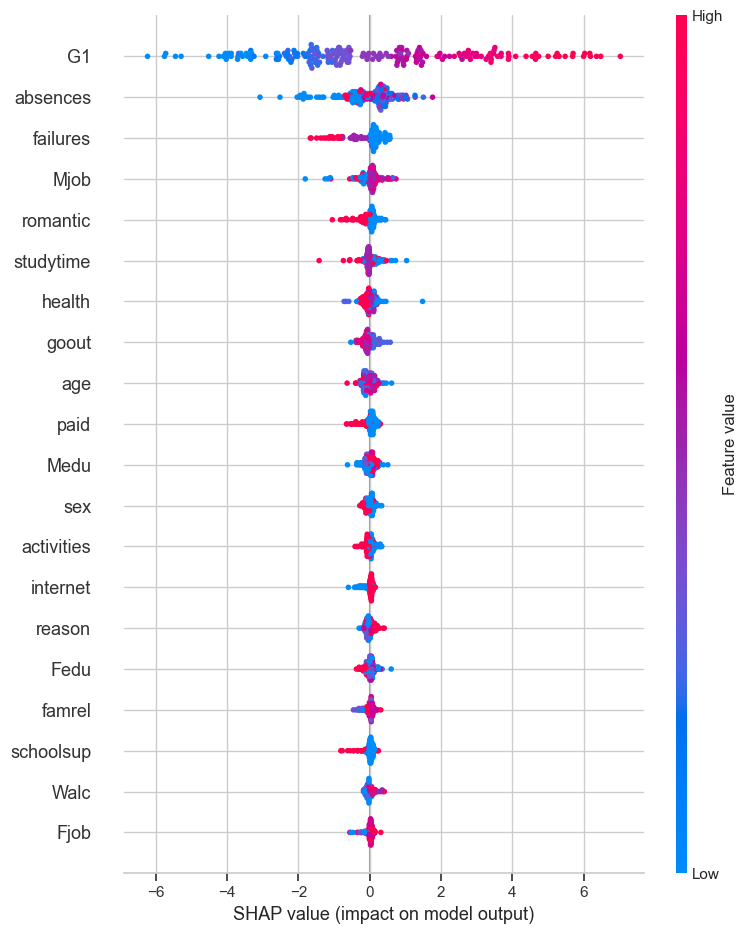

In [31]:
import shap

explainer = shap.Explainer(model, X_test)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)


# Are you able to find commonalities between the erroneous samples?

The two highest residual examples involved cases where both G1 and G3 had an average score of 8, but the actual G3 was 0. The model failed to predict these accurately because it primarily relies on G2, which does not align with these examples.

Additionally, All samples in the dataset have absences = 0, suggesting that these students had perfect attendance but were still predicted incorrectly. This could indicate that the model is overemphasizing absences when predicting final grades.

# Future Work
### Introduce a Binary Column: 
Add a binary column to indicate whether G3 is zero or not. This could help the model identify patterns specific to students with zero final grades.
### Transform G3: 
Consider replacing G3 with the average of G1 and G2. This transformation might stabilize the predictions and improve the model's ability to generalize.
### Explore Alternative Models:
 Investigate models that are better at handling outliers or relationships between features, as the current model heavily relies on G2 and might overlook other critical patterns.

Reference: Chat GPT